In [1]:
# Import Dependencies
from pathlib import Path
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import matplotlib.dates as mdates

In [2]:
# Load files
readpath = Path.cwd() / 'Resources' / 'Mergeddata.csv'

In [3]:
spotipyDF = pd.read_csv(readpath, encoding = "utf-8")

In [4]:
uniqueArtists = np.unique(spotipyDF['artist'])

In [5]:
clean_Spoti = spotipyDF.drop(['Unnamed: 0', 'Unnamed: 0.1','URL', 'trackID', 'name', 'artist', 'Year', 'Region', 'timeSignature'], axis = 1)
clean_Spoti

,Position,TrackName,Artist,Streams,Date,bins,TrackID,album,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493.0,1/1/2017,"1,000,001 - 1,500,000",4Km5HrUvYTaSUfiSGPJeQR,Culture,2017-01-27,343150,75,0.927,0.0610,0.665,0.000000,0.123,-5.313,0.2440,127.076
1,2,Fake Love,Drake,1180074.0,1/1/2017,"1,000,001 - 1,500,000",343YBumqHu19cGoGARUTsd,More Life,2017-03-18,210937,74,0.928,0.1050,0.481,0.000000,0.176,-9.350,0.2870,134.007
2,3,Starboy,The Weeknd,1064351.0,1/1/2017,"1,000,001 - 1,500,000",5aAx2yezTd8zXrkmtKl66Z,Starboy,2016-11-25,230453,3,0.681,0.1650,0.594,0.000003,0.134,-7.028,0.2820,186.054
3,4,Closer,The Chainsmokers,1010492.0,1/1/2017,"1,000,001 - 1,500,000",7BKLCZ1jbUBVqRi2FVlTVw,Closer,2016-07-29,244960,84,0.748,0.4140,0.524,0.000000,0.111,-5.599,0.0338,95.010
4,5,Black Beatles,Rae Sremmurd,874289.0,1/1/2017,"750,001 - 1,000,000",6fujklziTHa8uoM5OQSfIo,SremmLife 2 (Deluxe),2016-08-12,291893,75,0.794,0.1420,0.632,0.000000,0.128,-6.163,0.0649,145.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72138,196,Poles 1469,Trippie Redd,176019.0,12/31/2017,"50,001 - 250,000",4fC5jw1TI59GH1emfN1wtk,A Love Letter To You,2017-05-14,149575,67,0.741,0.2350,0.761,0.000000,0.119,-3.871,0.0512,81.543
72139,197,Criminal,Natti Natasha,175880.0,12/31/2017,"50,001 - 250,000",6Za3190Sbw39BBC77WSS1C,Criminal,2017-09-01,232549,75,0.814,0.0300,0.813,0.000093,0.255,-3.023,0.0561,79.997
72140,198,Galway Girl,Ed Sheeran,174859.0,12/31/2017,"50,001 - 250,000",0afhq8XCExXpqazXczTSve,÷ (Deluxe),2017-03-03,170826,78,0.624,0.0735,0.876,0.000000,0.327,-3.374,0.1000,99.943
72141,199,From The D To The A (feat. Lil Yachty),Tee Grizzley,174168.0,12/31/2017,"50,001 - 250,000",2NyrXRn4tancYPW6JwtTl2,From The D To The A (feat. Lil Yachty),2017-03-17,158684,71,0.851,0.1950,0.625,0.000000,0.266,-5.417,0.3030,99.061


In [6]:
clean_Spoti.columns=['Position', 'Track Name', 'Artist', 'Streams', 'Date', 'Bins', 'TrackID',
       'Album', 'Release Date', 'Length', 'Popularity', 'Danceability',
       'Acousticness', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo']
clean_Spoti

,Position,Track Name,Artist,Streams,Date,Bins,TrackID,Album,Release Date,Length,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493.0,1/1/2017,"1,000,001 - 1,500,000",4Km5HrUvYTaSUfiSGPJeQR,Culture,2017-01-27,343150,75,0.927,0.0610,0.665,0.000000,0.123,-5.313,0.2440,127.076
1,2,Fake Love,Drake,1180074.0,1/1/2017,"1,000,001 - 1,500,000",343YBumqHu19cGoGARUTsd,More Life,2017-03-18,210937,74,0.928,0.1050,0.481,0.000000,0.176,-9.350,0.2870,134.007
2,3,Starboy,The Weeknd,1064351.0,1/1/2017,"1,000,001 - 1,500,000",5aAx2yezTd8zXrkmtKl66Z,Starboy,2016-11-25,230453,3,0.681,0.1650,0.594,0.000003,0.134,-7.028,0.2820,186.054
3,4,Closer,The Chainsmokers,1010492.0,1/1/2017,"1,000,001 - 1,500,000",7BKLCZ1jbUBVqRi2FVlTVw,Closer,2016-07-29,244960,84,0.748,0.4140,0.524,0.000000,0.111,-5.599,0.0338,95.010
4,5,Black Beatles,Rae Sremmurd,874289.0,1/1/2017,"750,001 - 1,000,000",6fujklziTHa8uoM5OQSfIo,SremmLife 2 (Deluxe),2016-08-12,291893,75,0.794,0.1420,0.632,0.000000,0.128,-6.163,0.0649,145.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72138,196,Poles 1469,Trippie Redd,176019.0,12/31/2017,"50,001 - 250,000",4fC5jw1TI59GH1emfN1wtk,A Love Letter To You,2017-05-14,149575,67,0.741,0.2350,0.761,0.000000,0.119,-3.871,0.0512,81.543
72139,197,Criminal,Natti Natasha,175880.0,12/31/2017,"50,001 - 250,000",6Za3190Sbw39BBC77WSS1C,Criminal,2017-09-01,232549,75,0.814,0.0300,0.813,0.000093,0.255,-3.023,0.0561,79.997
72140,198,Galway Girl,Ed Sheeran,174859.0,12/31/2017,"50,001 - 250,000",0afhq8XCExXpqazXczTSve,÷ (Deluxe),2017-03-03,170826,78,0.624,0.0735,0.876,0.000000,0.327,-3.374,0.1000,99.943
72141,199,From The D To The A (feat. Lil Yachty),Tee Grizzley,174168.0,12/31/2017,"50,001 - 250,000",2NyrXRn4tancYPW6JwtTl2,From The D To The A (feat. Lil Yachty),2017-03-17,158684,71,0.851,0.1950,0.625,0.000000,0.266,-5.417,0.3030,99.061


In [7]:
max_stream = clean_Spoti.groupby('Artist')['Streams'].sum()
topartists_df = pd.DataFrame(data=max_stream)

maxArtist = topartists_df.idxmax()[0]
minArtist = topartists_df.idxmin()[0]

print(maxArtist)
print(minArtist)

Drake
Phil Collins


In [8]:
high_song = clean_Spoti.groupby('Track Name')['Streams'].sum()
topsong_df = pd.DataFrame(data=high_song)

maxSong = topsong_df.idxmax()[0]
minSong = topsong_df.idxmin()[0]

print(maxSong)
print(minSong)

HUMBLE.
Give Me Love


In [9]:
freqArt = clean_Spoti.groupby(['Artist']).count() 

freqArt_df = pd.DataFrame(data=freqArt)

freqArtMax = freqArt_df.idxmax()[0]
freqArtMin = freqArt_df.idxmin()[0]

print(freqArtMax)
print(freqArtMin)

Drake
A-Trak


In [10]:
freqSongCount = clean_Spoti.groupby('TrackID')['Position'].count()
freqSongSum = clean_Spoti.groupby('TrackID')['Streams'].sum()

data1 = pd.DataFrame(data=freqSongCount)
data2 = pd.DataFrame(data=freqSongSum)

freqSong_df = pd.merge(data1, data2, how='outer', on = 'TrackID')
freqSongMax = freqSong_df.loc[freqSong_df['Position'] == 362]
freqSongMin = freqSong_df.loc[freqSong_df['Position'] == 1]

In [11]:
freqSong_df

,Position,Streams
TrackID,,
000xQL6tZNLJzIrtIgxqSl,68,20981589.0
007d7JT41sSc1HqWTs4uw7,1,176674.0
00BuKLSAFkaEkaVAgIMbeA,1,209865.0
00DcwM45CMDjGChnoFRQ6y,1,212052.0
00lNx0OcTJrS3MKHcB80HY,41,8944840.0
...,...,...
7zLGHiDWd9T1Rxw4PQCb13,1,1063321.0
7zOoHxDt1duHL8czY7o7ab,1,240548.0
7zTx8ePYAmPFQuxP3xlXZn,53,13381776.0


In [12]:
temp = freqSongMax.sort_values(by='Streams', ascending=False)
temp = temp.idxmax()[0]
# temp = clean_Spoti.loc[clean_Spoti['TrackID'] == temp, 'Track Name']
banger = temp
banger

'3a1lNhkSLSkpJE4MSHpDu9'

In [13]:
temp = freqSongMin.sort_values(by='Streams')
temp = temp.idxmin()[0]
flop = temp
flop

'0SuG9kyzGRpDqrCWtgD6Lq'

In [14]:
freqSongMax = freqSong_df.idxmax()[0]
freqSongMin = freqSong_df.idxmin()[0]

freqSongMaxName = spotipyDF.loc[spotipyDF['TrackID'] == freqSongMax,['TrackName','Streams']]
freqSongMinName = spotipyDF.loc[spotipyDF['TrackID'] == freqSongMin,['TrackName','Streams']]
print(freqSongMaxName)
print(freqSongMinName)
print(freqSongMax)
print(freqSongMin)

                     TrackName   Streams
39     iSpy (feat. Lil Yachty)  349836.0
227    iSpy (feat. Lil Yachty)  368515.0
424    iSpy (feat. Lil Yachty)  439810.0
623    iSpy (feat. Lil Yachty)  469245.0
820    iSpy (feat. Lil Yachty)  486252.0
...                        ...       ...
71234  iSpy (feat. Lil Yachty)  283608.0
71429  iSpy (feat. Lil Yachty)  292468.0
71633  iSpy (feat. Lil Yachty)  277661.0
71824  iSpy (feat. Lil Yachty)  283455.0
72032  iSpy (feat. Lil Yachty)  270704.0

[362 rows x 2 columns]
        TrackName   Streams
8995  Love Myself  176674.0
2EEeOnHehOozLq4aS0n6SL
007d7JT41sSc1HqWTs4uw7


In [15]:
freqSongMaxName

,TrackName,Streams
39,iSpy (feat. Lil Yachty),349836.0
227,iSpy (feat. Lil Yachty),368515.0
424,iSpy (feat. Lil Yachty),439810.0
623,iSpy (feat. Lil Yachty),469245.0
820,iSpy (feat. Lil Yachty),486252.0
...,...,...
71234,iSpy (feat. Lil Yachty),283608.0
71429,iSpy (feat. Lil Yachty),292468.0
71633,iSpy (feat. Lil Yachty),277661.0
71824,iSpy (feat. Lil Yachty),283455.0


In [16]:
freqSongMinName

,TrackName,Streams
8995,Love Myself,176674.0


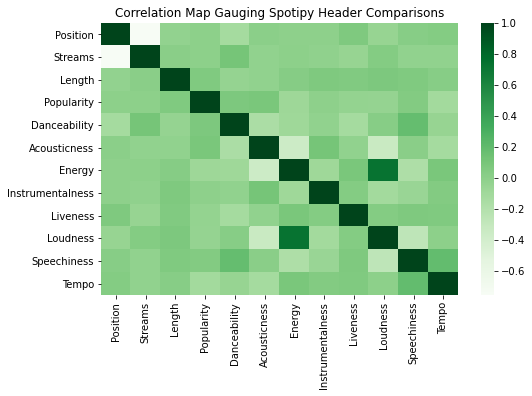

In [17]:
correlationMap = clean_Spoti[['Position', 'Track Name', 'Artist', 'Streams', 'Date', 'Bins', 'TrackID',
       'Album', 'Release Date', 'Length', 'Popularity', 'Danceability',
       'Acousticness', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo']].corr()
fig, ax = plt.subplots(figsize = (8,5))
plt.title("Correlation Map Gauging Spotipy Header Comparisons")
sns.heatmap(correlationMap, cmap="Greens")

<ipython-input-18-700b84f682ec>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(bins, labels = labels, autopct = "%1.1f%%")


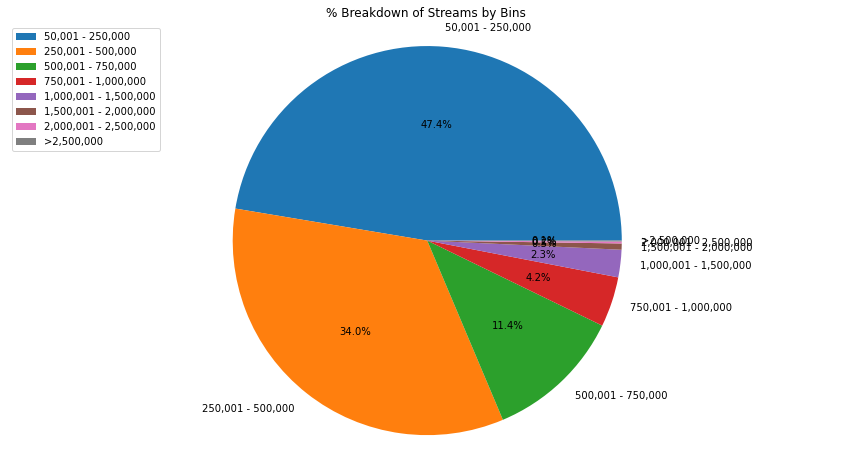

In [18]:
#just takes the time of time a song falls into a bin. need discrete.
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw=dict(aspect="equal"))
bins = pd.DataFrame(clean_Spoti["Bins"].value_counts())
labels = bins.index.values
plt.pie(bins, labels = labels, autopct = "%1.1f%%")
plt.title("% Breakdown of Streams by Bins")
plt.axis("equal")
ax.legend(loc="upper left")
plt.show()

In [19]:
#pie graph that shows streams of top 10 artists

In [20]:
#line graph that shows number of streams over time


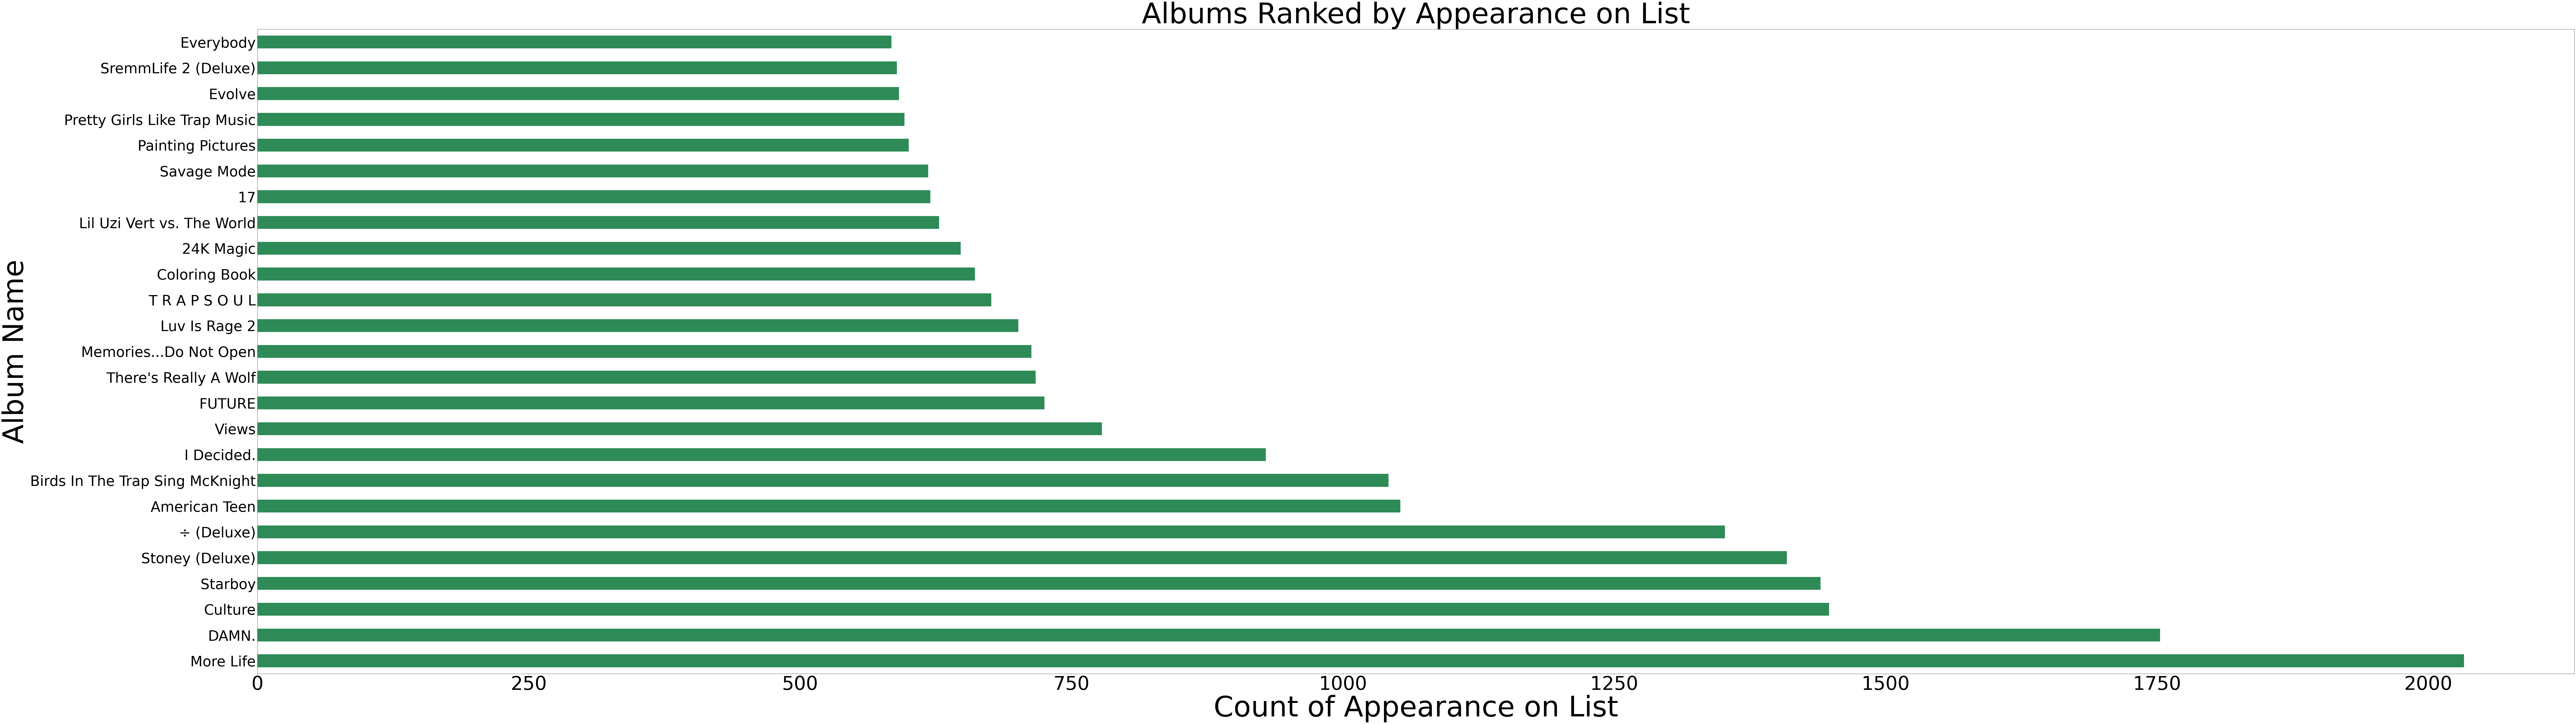

In [55]:
#top albums on list 
f, ax = plt.subplots(figsize=(175,50))
clean_Spoti['Album'].groupby(clean_Spoti['Artist']).value_counts()
clean_Spoti['Album'].value_counts()[:25].plot(kind='barh',color='seagreen')
plt.xticks(fontsize=80)
plt.yticks(fontsize=60)
plt.title("Albums Ranked by Appearance on List", fontsize=120)
plt.ylabel("Album Name", fontsize=120)
plt.xlabel("Count of Appearance on List", fontsize=120)
plt.savefig('Albums Ranked by Appearance on List')

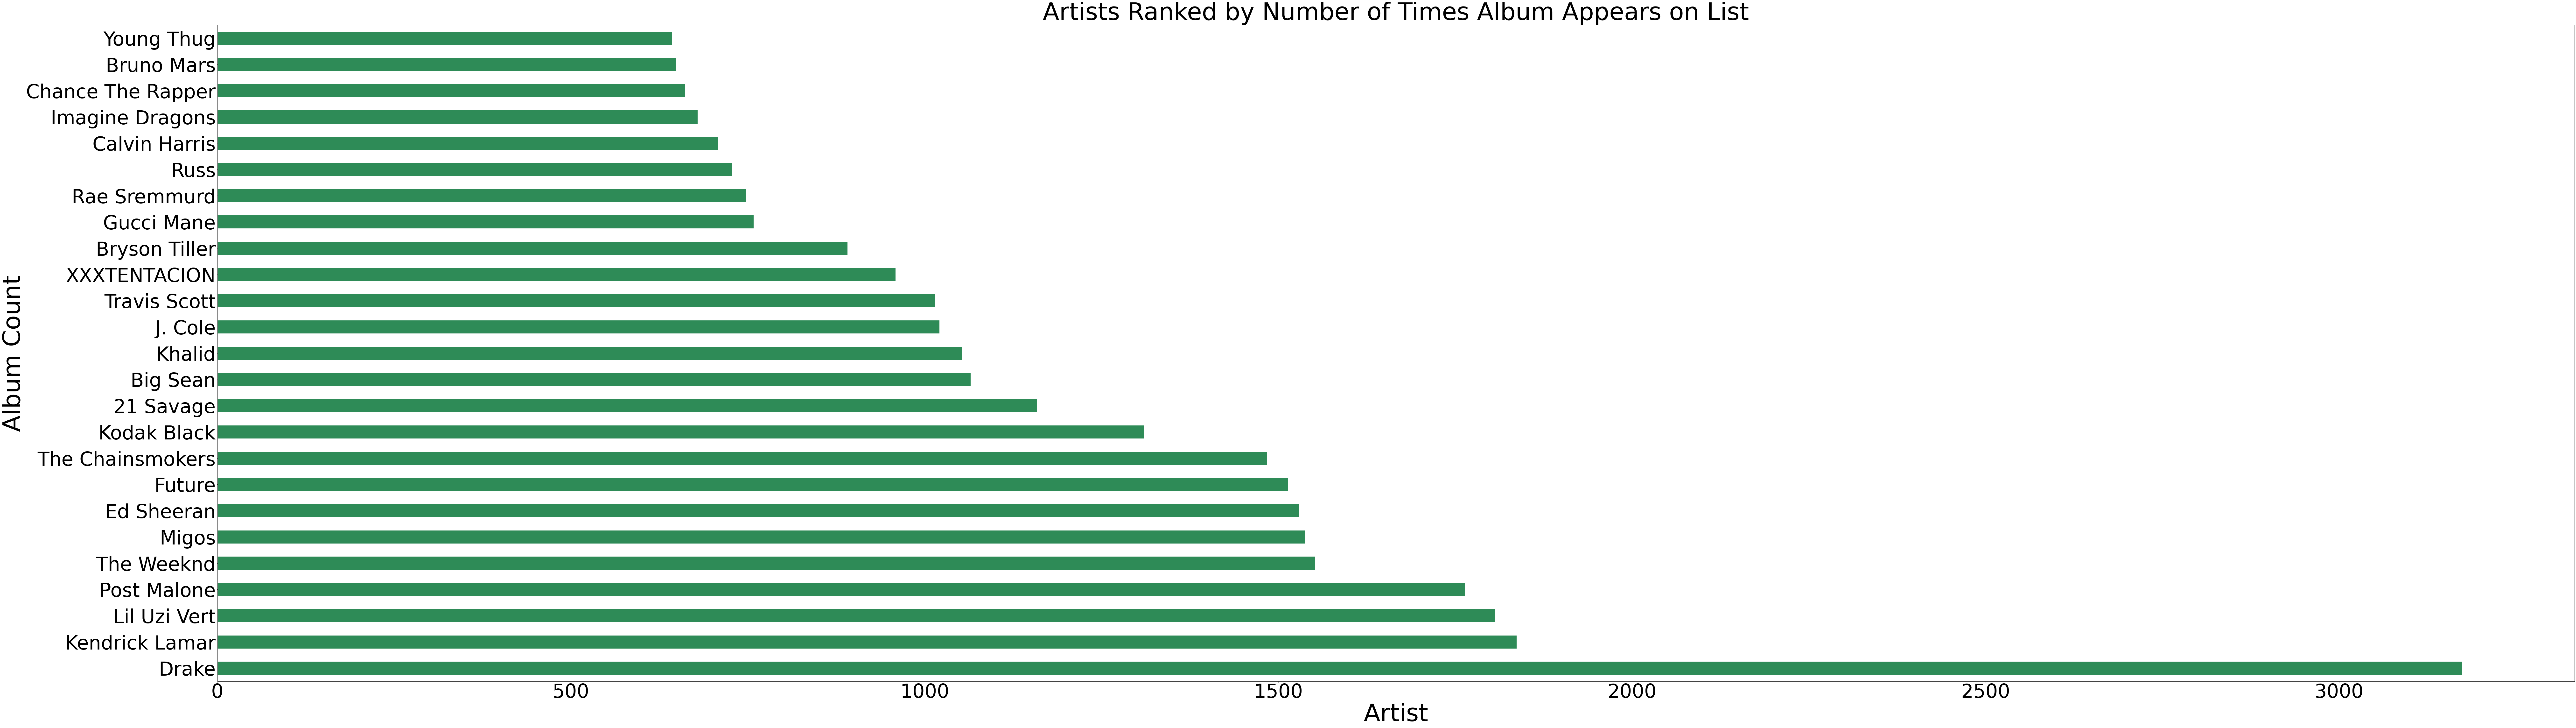

In [71]:
#artists ranked by number of times album appears on list
f, ax = plt.subplots(figsize=(175,50))
clean_Spoti['Artist'].groupby(clean_Spoti['Album']).value_counts()
clean_Spoti['Artist'].value_counts()[:25].plot(kind='barh', color='seagreen')
plt.title("Artists Ranked by Number of Times Album Appears on List", fontsize=100)
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)
plt.ylabel("Album Count", fontsize=100)
plt.xlabel("Artist", fontsize=100)
plt.savefig('Artists Ranked by Number of Times Album Appears on List')

Text(0, 0.5, 'Count')

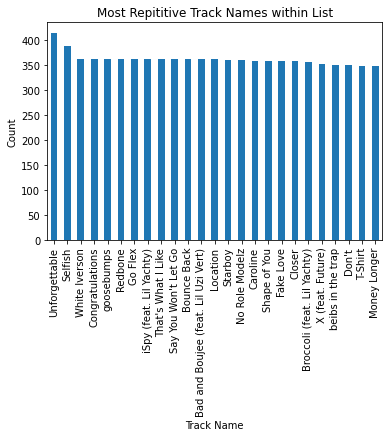

In [23]:
clean_Spoti['Artist'].groupby(clean_Spoti['Track Name']).value_counts()
clean_Spoti['Track Name'].value_counts()[:25].plot(kind='bar')
plt.title("Most Repititive Track Names within List")
plt.xlabel("Track Name")
plt.ylabel("Count")

## Bar and Scatter Charts of Older Songs

In [24]:
# Create a copy of clean_Spoti to manipulate for release year, extract release YEAR, and groupby that year
releaseYear = clean_Spoti.copy()
releaseYear['Release Year'] = releaseYear['Release Date'].str.extract('(\d{4})', expand = False)
releaseYear['Release Year'] = releaseYear['Release Year'].astype(float)
relYearGroup = releaseYear.groupby('Release Year').count()
releaseYear.drop(['Bins'], axis=1, inplace=True)
releaseYear.head()

,Position,Track Name,Artist,Streams,Date,TrackID,Album,Release Date,Length,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Release Year
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493.0,1/1/2017,4Km5HrUvYTaSUfiSGPJeQR,Culture,2017-01-27,343150,75,0.927,0.061,0.665,0.000000,0.123,-5.313,0.2440,127.076,2017.0
1,2,Fake Love,Drake,1180074.0,1/1/2017,343YBumqHu19cGoGARUTsd,More Life,2017-03-18,210937,74,0.928,0.105,0.481,0.000000,0.176,-9.350,0.2870,134.007,2017.0
2,3,Starboy,The Weeknd,1064351.0,1/1/2017,5aAx2yezTd8zXrkmtKl66Z,Starboy,2016-11-25,230453,3,0.681,0.165,0.594,0.000003,0.134,-7.028,0.2820,186.054,2016.0
3,4,Closer,The Chainsmokers,1010492.0,1/1/2017,7BKLCZ1jbUBVqRi2FVlTVw,Closer,2016-07-29,244960,84,0.748,0.414,0.524,0.000000,0.111,-5.599,0.0338,95.010,2016.0
4,5,Black Beatles,Rae Sremmurd,874289.0,1/1/2017,6fujklziTHa8uoM5OQSfIo,SremmLife 2 (Deluxe),2016-08-12,291893,75,0.794,0.142,0.632,0.000000,0.128,-6.163,0.0649,145.926,2016.0


<ipython-input-25-5125fc26f459>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


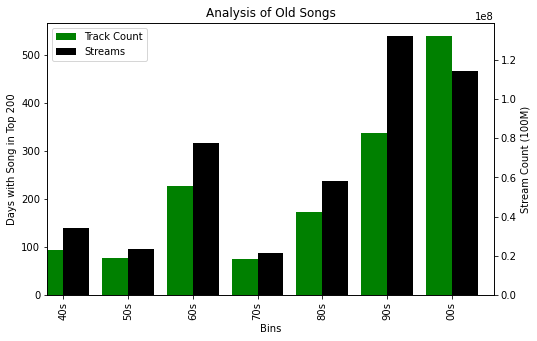

In [25]:
# Perform the binning and bar chart creation
relYearBins = [0, 1949, 1959, 1969, 1979, 1989, 1999, 2009]
relYearLabels = ['40s', '50s', '60s', '70s', '80s', '90s', '00s']
releaseYear['Bins'] = pd.cut(releaseYear['Release Year'], relYearBins, labels=relYearLabels)
barData1 = releaseYear.groupby('Bins')['Position'].count()
barData2 = releaseYear.groupby('Bins')['Streams'].sum()

bar_df = pd.DataFrame(data=[barData1])
bar_df = bar_df.transpose()
bar_df['Streams'] = barData2
bar_df.columns = ['Track Count', 'Streams']

fig, ax = plt.subplots(figsize = (8,5))
ax2 = ax.twinx()

width = 0.4

bar_df['Track Count'].plot(kind='bar', color='green', ax=ax, width=width, position=1)
bar_df.Streams.plot(kind='bar', color='black', ax=ax2, width=width, position=0)

# Use this to get both the legned handles in one box
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.set_ylabel('Days with Song in Top 200')
ax2.set_ylabel('Stream Count (100M)')
ax.set_title('Analysis of Old Songs')

plt.savefig("Old Song Count and Streams Comparison")
fig.show()

In [26]:
releaseYear.head()

,Position,Track Name,Artist,Streams,Date,TrackID,Album,Release Date,Length,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Release Year,Bins
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493.0,1/1/2017,4Km5HrUvYTaSUfiSGPJeQR,Culture,2017-01-27,343150,75,0.927,0.061,0.665,0.000000,0.123,-5.313,0.2440,127.076,2017.0,NaN
1,2,Fake Love,Drake,1180074.0,1/1/2017,343YBumqHu19cGoGARUTsd,More Life,2017-03-18,210937,74,0.928,0.105,0.481,0.000000,0.176,-9.350,0.2870,134.007,2017.0,NaN
2,3,Starboy,The Weeknd,1064351.0,1/1/2017,5aAx2yezTd8zXrkmtKl66Z,Starboy,2016-11-25,230453,3,0.681,0.165,0.594,0.000003,0.134,-7.028,0.2820,186.054,2016.0,NaN
3,4,Closer,The Chainsmokers,1010492.0,1/1/2017,7BKLCZ1jbUBVqRi2FVlTVw,Closer,2016-07-29,244960,84,0.748,0.414,0.524,0.000000,0.111,-5.599,0.0338,95.010,2016.0,NaN
4,5,Black Beatles,Rae Sremmurd,874289.0,1/1/2017,6fujklziTHa8uoM5OQSfIo,SremmLife 2 (Deluxe),2016-08-12,291893,75,0.794,0.142,0.632,0.000000,0.128,-6.163,0.0649,145.926,2016.0,NaN


In [27]:
# Create a copy of the dataframe for scatter and linear regression
relYearScatter = releaseYear.copy()
trackNameMatcher = releaseYear[['TrackID', 'Track Name', 'Release Year']]
trackNameMatcher

,TrackID,Track Name,Release Year
0,4Km5HrUvYTaSUfiSGPJeQR,Bad and Boujee (feat. Lil Uzi Vert),2017.0
1,343YBumqHu19cGoGARUTsd,Fake Love,2017.0
2,5aAx2yezTd8zXrkmtKl66Z,Starboy,2016.0
3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,2016.0
4,6fujklziTHa8uoM5OQSfIo,Black Beatles,2016.0
...,...,...,...
72138,4fC5jw1TI59GH1emfN1wtk,Poles 1469,2017.0
72139,6Za3190Sbw39BBC77WSS1C,Criminal,2017.0
72140,0afhq8XCExXpqazXczTSve,Galway Girl,2017.0
72141,2NyrXRn4tancYPW6JwtTl2,From The D To The A (feat. Lil Yachty),2017.0


In [28]:
relYearScatter = relYearScatter.loc[relYearScatter['Release Year'] < 2010.0, ['TrackID','Streams','Release Year']]
relYearGroup = relYearScatter.groupby('TrackID')['Streams'].sum()

In [29]:
finalScatter = pd.merge(trackNameMatcher, relYearGroup, how='right', on = 'TrackID')
finalScatter = finalScatter.dropna()
finalScatter = finalScatter.drop_duplicates()

In [30]:
slope, intercept, r_value, p_value, std_err = st.linregress(finalScatter['Release Year'], finalScatter['Streams'])
lineq1 = slope*finalScatter['Release Year'] + intercept

The correlation between Total Stream Count and track Release Year is -0.08, so it is very weakly negatively correlated.


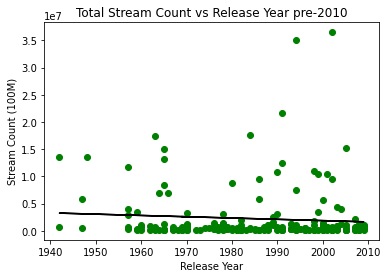

In [31]:
scat2 = plt.plot(finalScatter['Release Year'], lineq1, color='black')
scat2 = plt.scatter(finalScatter['Release Year'], finalScatter['Streams'], color='green')
scat2 = plt.xlabel('Release Year')
scat2 = plt.ylabel('Stream Count (100M)')
scat2 = plt.title('Total Stream Count vs Release Year pre-2010')
print(f'The correlation between Total Stream Count and track Release Year is {r_value:.2f}, so it is very weakly negatively correlated.')
plt.savefig("Total Stream Count vs Release Year pre-2010")